# Predicting Avocado Price With Machine Learning in R

## Prepared by

**Author:** Shinin Varongchayakul

**Date:** 15 Apr 2025

**Language:** R

## Dataset

**Name:** Avocado Price

**Source:** https://www.kaggle.com/datasets/neuromusic/avocado-prices?hl=en-GB

**Retrived Date:** 15 Apr 2025

## Business Problems
A grocery retail chain wants to optimise their avocado pricing as avocado is one of their best-selling items.


They want to understand:
- What factors influence avocado price
- How the price changes over time
- How the price changes across regions
- Comparison of organic versus conventional pricing strategies



They also want to be able to predict avocado price.



Avocado Price dataset from Kaggle will be used to simulate the situation here.

## Analysis Objectives
Given the business problems, the goals of this analysis are twofold:
1. Explore the pattern of avocado pricing across different factors
2. Build a predictive model to predict avocado pricing

## 1. Install & Load Packages

In [ ]:
# Install
install.packages("effsize") # effect size calculation
install.packages("ggcorrplot") # correlation matrix
install.packages("tidyverse") # data manipulation
install.packages("tidymodels") # machine learning
install.packages("lubridate") # date manipulation

In [ ]:
# Load
library(effsize)
library(ggcorrplot)
library(tidyverse)
library(tidymodels)
library(lubridate)

## 2. Load & Prepare the Dataset

### 2.1 Load the Dataset

In [56]:
# Load
avocados <- read_csv("avocado_price_dataset.csv")

New names:
• `` -> `...1`
Rows: 18249 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): type, region
dbl  (11): ...1, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, S...
date  (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [57]:
# Preview the first 10 row
head(avocados, 10)

...1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0,conventional,2015,Albany


In [58]:
# View the structure
glimpse(avocados)

Rows: 18,249
Columns: 14
$ ...1           <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1…
$ Date           <date> 2015-12-27, 2015-12-20, 2015-12-13, 2015-12-06, 2015-1…
$ AveragePrice   <dbl> 1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1…
$ `Total Volume` <dbl> 64236.62, 54876.98, 118220.22, 78992.15, 51039.60, 5597…
$ `4046`         <dbl> 1036.74, 674.28, 794.70, 1132.00, 941.48, 1184.27, 1368…
$ `4225`         <dbl> 54454.85, 44638.81, 109149.67, 71976.41, 43838.39, 4806…
$ `4770`         <dbl> 48.16, 58.33, 130.50, 72.58, 75.78, 43.61, 93.26, 80.00…
$ `Total Bags`   <dbl> 8696.87, 9505.56, 8145.35, 5811.16, 6183.95, 6683.91, 8…
$ `Small Bags`   <dbl> 8603.62, 9408.07, 8042.21, 5677.40, 5986.26, 6556.47, 8…
$ `Large Bags`   <dbl> 93.25, 97.49, 103.14, 133.76, 197.69, 127.44, 122.05, 5…
$ `XLarge Bags`  <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0…
$ type           <chr> "conventional", "conventional", "conventional", "conven…
$ year         

Comments:
- There are 18,249 records and 14 features.

### 2.2 Prepare the Dataset

In [67]:
# Create a copy of the dataset
avd_cleaned <- avocados

#### 2.2.1 Drop the Index Column

In [68]:
# Drop index column
avd_cleaned$...1 <- NULL

# Check the results
glimpse(avd_cleaned)

Rows: 18,249
Columns: 13
$ Date           <date> 2015-12-27, 2015-12-20, 2015-12-13, 2015-12-06, 2015-1…
$ AveragePrice   <dbl> 1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1…
$ `Total Volume` <dbl> 64236.62, 54876.98, 118220.22, 78992.15, 51039.60, 5597…
$ `4046`         <dbl> 1036.74, 674.28, 794.70, 1132.00, 941.48, 1184.27, 1368…
$ `4225`         <dbl> 54454.85, 44638.81, 109149.67, 71976.41, 43838.39, 4806…
$ `4770`         <dbl> 48.16, 58.33, 130.50, 72.58, 75.78, 43.61, 93.26, 80.00…
$ `Total Bags`   <dbl> 8696.87, 9505.56, 8145.35, 5811.16, 6183.95, 6683.91, 8…
$ `Small Bags`   <dbl> 8603.62, 9408.07, 8042.21, 5677.40, 5986.26, 6556.47, 8…
$ `Large Bags`   <dbl> 93.25, 97.49, 103.14, 133.76, 197.69, 127.44, 122.05, 5…
$ `XLarge Bags`  <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0…
$ type           <chr> "conventional", "conventional", "conventional", "conven…
$ year           <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2…
$ region       

#### 2.2.2 Rename the Columns

In [69]:
# Rename the columns
avd_cleaned <- avd_cleaned |>
  
  # Rename
  rename(date = Date,
         avg_price = AveragePrice,
         vol_total = `Total Volume`,
         vol_4046 = `4046`,
         vol_4225 = `4225`,
         vol_4770 = `4770`,
         bags_total = `Total Bags`,
         bags_small = `Small Bags`,
         bags_large = `Large Bags`,
         bags_xl = `XLarge Bags`,
         pricing_strategy = type,
         year = year,
         region = region)

# Check the results
glimpse(avd_cleaned)

Rows: 18,249
Columns: 13
$ date             <date> 2015-12-27, 2015-12-20, 2015-12-13, 2015-12-06, 2015…
$ avg_price        <dbl> 1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02,…
$ vol_total        <dbl> 64236.62, 54876.98, 118220.22, 78992.15, 51039.60, 55…
$ vol_4046         <dbl> 1036.74, 674.28, 794.70, 1132.00, 941.48, 1184.27, 13…
$ vol_4225         <dbl> 54454.85, 44638.81, 109149.67, 71976.41, 43838.39, 48…
$ vol_4770         <dbl> 48.16, 58.33, 130.50, 72.58, 75.78, 43.61, 93.26, 80.…
$ bags_total       <dbl> 8696.87, 9505.56, 8145.35, 5811.16, 6183.95, 6683.91,…
$ bags_small       <dbl> 8603.62, 9408.07, 8042.21, 5677.40, 5986.26, 6556.47,…
$ bags_large       <dbl> 93.25, 97.49, 103.14, 133.76, 197.69, 127.44, 122.05,…
$ bags_xl          <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ pricing_strategy <chr> "conventional", "conventional", "conventional", "conv…
$ year             <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ region       

#### 2.2.3 Convert `date` to Date

In [70]:
# Convert `date` to Date
avd_cleaned$date <- as.Date(avd_cleaned$date)

# Check the results
glimpse(avd_cleaned)

Rows: 18,249
Columns: 13
$ date             <date> 2015-12-27, 2015-12-20, 2015-12-13, 2015-12-06, 2015…
$ avg_price        <dbl> 1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02,…
$ vol_total        <dbl> 64236.62, 54876.98, 118220.22, 78992.15, 51039.60, 55…
$ vol_4046         <dbl> 1036.74, 674.28, 794.70, 1132.00, 941.48, 1184.27, 13…
$ vol_4225         <dbl> 54454.85, 44638.81, 109149.67, 71976.41, 43838.39, 48…
$ vol_4770         <dbl> 48.16, 58.33, 130.50, 72.58, 75.78, 43.61, 93.26, 80.…
$ bags_total       <dbl> 8696.87, 9505.56, 8145.35, 5811.16, 6183.95, 6683.91,…
$ bags_small       <dbl> 8603.62, 9408.07, 8042.21, 5677.40, 5986.26, 6556.47,…
$ bags_large       <dbl> 93.25, 97.49, 103.14, 133.76, 197.69, 127.44, 122.05,…
$ bags_xl          <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ pricing_strategy <chr> "conventional", "conventional", "conventional", "conv…
$ year             <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ region       

#### 2.2.4 Extract Months From `date`

In [ ]:
# Extract month from `date`
avd_cleaned$month <- format(avd_cleaned$date,
                            "%B")

# Convert `month` to factor
avd_cleaned$month <- factor(avd_cleaned$month,
                            levels = month.name,
                            ordered = TRUE)

# Check the results
glimpse(avd_cleaned)

Rows: 18,249
Columns: 14
$ date             <date> 2015-12-27, 2015-12-20, 2015-12-13, 2015-12-06, 2015…
$ avg_price        <dbl> 1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02,…
$ vol_total        <dbl> 64236.62, 54876.98, 118220.22, 78992.15, 51039.60, 55…
$ vol_4046         <dbl> 1036.74, 674.28, 794.70, 1132.00, 941.48, 1184.27, 13…
$ vol_4225         <dbl> 54454.85, 44638.81, 109149.67, 71976.41, 43838.39, 48…
$ vol_4770         <dbl> 48.16, 58.33, 130.50, 72.58, 75.78, 43.61, 93.26, 80.…
$ bags_total       <dbl> 8696.87, 9505.56, 8145.35, 5811.16, 6183.95, 6683.91,…
$ bags_small       <dbl> 8603.62, 9408.07, 8042.21, 5677.40, 5986.26, 6556.47,…
$ bags_large       <dbl> 93.25, 97.49, 103.14, 133.76, 197.69, 127.44, 122.05,…
$ bags_xl          <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ pricing_strategy <chr> "conventional", "conventional", "conventional", "conv…
$ year             <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ region       

#### 2.2.5 Group `region` into Meaningful Groups

In [72]:
# Group region into more meaningful regions

# Create a data frame for region grouping
region_groups <- data.frame(
  region = c(
    "Albany", "Atlanta", "BaltimoreWashington", "Boise", "Boston", "BuffaloRochester",
    "California", "Charlotte", "Chicago", "CincinnatiDayton", "Columbus", "DallasFtWorth",
    "Denver", "Detroit", "GrandRapids", "GreatLakes", "HarrisburgScranton", "HartfordSpringfield",
    "Houston", "Indianapolis", "Jacksonville", "LasVegas", "LosAngeles", "Louisville",
    "MiamiFtLauderdale", "Midsouth", "Nashville", "NewOrleansMobile", "NewYork", "Northeast",
    "NorthernNewEngland", "Orlando", "Philadelphia", "PhoenixTucson", "Pittsburgh", "Plains",
    "Portland", "RaleighGreensboro", "RichmondNorfolk", "Roanoke", "Sacramento", "SanDiego",
    "SanFrancisco", "Seattle", "SouthCarolina", "SouthCentral", "Southeast", "Spokane",
    "StLouis", "Syracuse", "Tampa", "TotalUS", "West", "WestTexNewMexico"
  ),
  region_group = c(
    "Northeast", "South", "Northeast", "West", "Northeast", "Northeast",
    "West", "South", "Midwest", "Midwest", "Midwest", "South",
    "West", "Midwest", "Midwest", "Midwest", "Northeast", "Northeast",
    "South", "Midwest", "South", "West", "West", "Midwest",
    "South", "South", "South", "South", "Northeast", "Northeast",
    "Northeast", "South", "Northeast", "West", "Northeast", "Midwest",
    "West", "South", "South", "South", "West", "West",
    "West", "West", "South", "South", "South", "West",
    "Midwest", "Northeast", "South", "National", "West", "South"
  )
)

# Left join
avd_cleaned <- left_join(avd_cleaned,
                         region_groups,
                         by = "region")

# Check the results
glimpse(avd_cleaned)


Rows: 18,249
Columns: 15
$ date             <date> 2015-12-27, 2015-12-20, 2015-12-13, 2015-12-06, 2015…
$ avg_price        <dbl> 1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02,…
$ vol_total        <dbl> 64236.62, 54876.98, 118220.22, 78992.15, 51039.60, 55…
$ vol_4046         <dbl> 1036.74, 674.28, 794.70, 1132.00, 941.48, 1184.27, 13…
$ vol_4225         <dbl> 54454.85, 44638.81, 109149.67, 71976.41, 43838.39, 48…
$ vol_4770         <dbl> 48.16, 58.33, 130.50, 72.58, 75.78, 43.61, 93.26, 80.…
$ bags_total       <dbl> 8696.87, 9505.56, 8145.35, 5811.16, 6183.95, 6683.91,…
$ bags_small       <dbl> 8603.62, 9408.07, 8042.21, 5677.40, 5986.26, 6556.47,…
$ bags_large       <dbl> 93.25, 97.49, 103.14, 133.76, 197.69, 127.44, 122.05,…
$ bags_xl          <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ pricing_strategy <chr> "conventional", "conventional", "conventional", "conv…
$ year             <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ region       

#### 2.2.6 Convert character Columns to factor

In [73]:
# Convert character columns to factor
avd_cleaned <- avd_cleaned |>
  
  # Convert to factor
  mutate(across(where(is.character),
                as.factor))

# Check the results
glimpse(avd_cleaned)

Rows: 18,249
Columns: 15
$ date             <date> 2015-12-27, 2015-12-20, 2015-12-13, 2015-12-06, 2015…
$ avg_price        <dbl> 1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02,…
$ vol_total        <dbl> 64236.62, 54876.98, 118220.22, 78992.15, 51039.60, 55…
$ vol_4046         <dbl> 1036.74, 674.28, 794.70, 1132.00, 941.48, 1184.27, 13…
$ vol_4225         <dbl> 54454.85, 44638.81, 109149.67, 71976.41, 43838.39, 48…
$ vol_4770         <dbl> 48.16, 58.33, 130.50, 72.58, 75.78, 43.61, 93.26, 80.…
$ bags_total       <dbl> 8696.87, 9505.56, 8145.35, 5811.16, 6183.95, 6683.91,…
$ bags_small       <dbl> 8603.62, 9408.07, 8042.21, 5677.40, 5986.26, 6556.47,…
$ bags_large       <dbl> 93.25, 97.49, 103.14, 133.76, 197.69, 127.44, 122.05,…
$ bags_xl          <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ pricing_strategy <fct> conventional, conventional, conventional, conventiona…
$ year             <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ region       

#### 2.2.7 Re-arrange the Columns

In [ ]:
# Re-arrange the columns
avd_cleaned <- avd_cleaned |>
  
  ## Select the columns
  select(date, year, month, dow,
         region_group, region,
         vol_total, vol_4046, vol_4225, vol_4770,
         bags_total, bags_small, bags_large, bags_xl,
         pricing_strategy, avg_price)

# Check the results
glimpse(avd_cleaned)


Rows: 18,249
Columns: 15
$ date             <date> 2015-12-27, 2015-12-20, 2015-12-13, 2015-12-06, 2015…
$ year             <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ month            <ord> December, December, December, December, November, Nov…
$ region           <fct> Albany, Albany, Albany, Albany, Albany, Albany, Alban…
$ region_group     <fct> Northeast, Northeast, Northeast, Northeast, Northeast…
$ vol_total        <dbl> 64236.62, 54876.98, 118220.22, 78992.15, 51039.60, 55…
$ vol_4046         <dbl> 1036.74, 674.28, 794.70, 1132.00, 941.48, 1184.27, 13…
$ vol_4225         <dbl> 54454.85, 44638.81, 109149.67, 71976.41, 43838.39, 48…
$ vol_4770         <dbl> 48.16, 58.33, 130.50, 72.58, 75.78, 43.61, 93.26, 80.…
$ bags_total       <dbl> 8696.87, 9505.56, 8145.35, 5811.16, 6183.95, 6683.91,…
$ bags_small       <dbl> 8603.62, 9408.07, 8042.21, 5677.40, 5986.26, 6556.47,…
$ bags_large       <dbl> 93.25, 97.49, 103.14, 133.76, 197.69, 127.44, 122.05,…
$ bags_xl      

#### 2.2.8 Check for Missing Values

In [75]:
# Check for missing values
anyNA(avd_cleaned)

[1] FALSE

Comments:
- No missing values found.

## 3. Exploratory Data Analaysis (EDA)

### 3.1 Overview

#### 3.1.1 Summary Statistics

In [76]:
# See summary stats
summary(avd_cleaned)

      date                 year           month     
 Min.   :2015-01-04   Min.   :2015   January :1944  
 1st Qu.:2015-10-25   1st Qu.:2015   March   :1836  
 Median :2016-08-14   Median :2016   February:1728  
 Mean   :2016-08-13   Mean   :2016   May     :1512  
 3rd Qu.:2017-06-04   3rd Qu.:2017   July    :1512  
 Max.   :2018-03-25   Max.   :2018   October :1512  
                                     (Other) :8205  
                 region         region_group    vol_total       
 Albany             :  338   Midwest  :3380   Min.   :      85  
 Atlanta            :  338   National : 338   1st Qu.:   10839  
 BaltimoreWashington:  338   Northeast:4056   Median :  107377  
 Boise              :  338   South    :6081   Mean   :  850644  
 Boston             :  338   West     :4394   3rd Qu.:  432962  
 BuffaloRochester   :  338                    Max.   :62505647  
 (Other)            :16221                                      
    vol_4046           vol_4225           vol_4770      

#### 3.1.2 Correlation Matrix

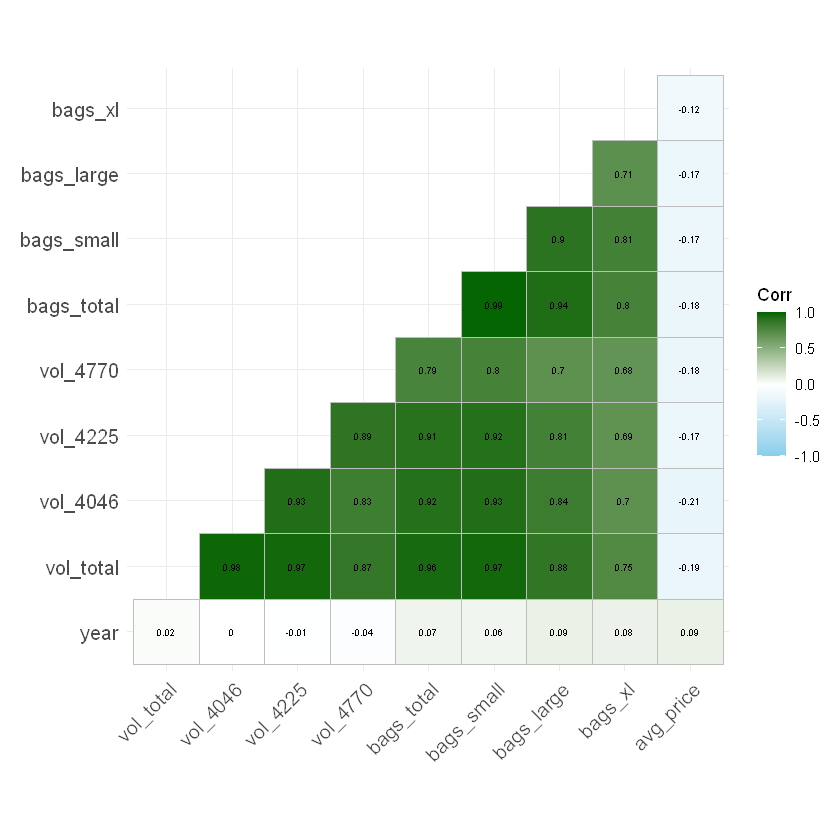

In [ ]:
# Create a correlation matrix
avd_cleaned |>
  
  # Select numeric columns
  select(where(is.numeric)) |>
  
  # Create a correlation matrix
  cor(use = "complete.obs") |>
  
  # Visualise
  ggcorrplot(lab = TRUE,
             type = "lower",
             colors = c("skyblue", "white", "darkgreen"),
             lab_size = 2)

Comments:
- The correlations between `avg_price` and other variables range from 0.08 to 0.21.
- `year` shows the weakest correlation at 0.09.
- `vol_4046` shows the strongest correlation at -0.21.
- The magnitude of the correlations suggest that price may stem from a combination of factors, rather than any single factor alone.
- Additionally, many factors overlap greatly, for example, `vol_total` and other factor related to the number of sales such as `vol_4046`.

### 3.1.3 Distribution of Price

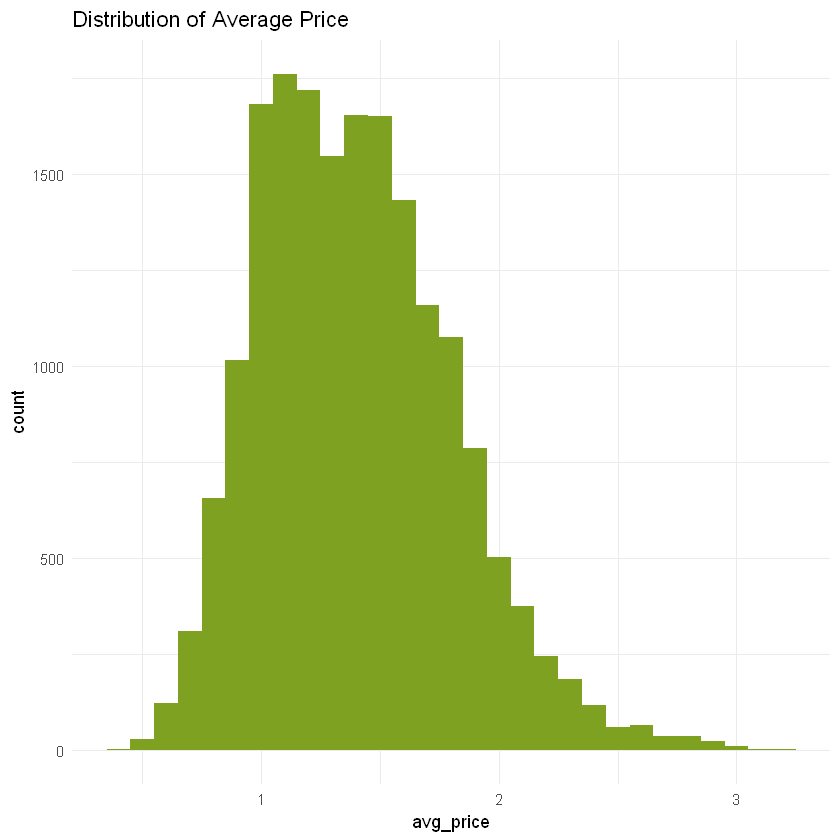

In [78]:
# Visualise the distribution of price
avd_cleaned |>
  
  # Aesthetic mapping
  ggplot(aes(x = avg_price)) +
  
  # Instantiate a box plot
  geom_histogram(binwidth = 0.1,
                 fill = "#7ea122") +
  
  # Add text elements
  labs(title = "Distribution of Average Price") +
  
  # Adjust theme to minimal
  theme_minimal()

Comments:
- The distribution appears normally distributed.
- This is in line with the `summary()` results which shows that median (1.370) and mean (1.406) are very close to one another.

### 3.2 Price vs Time

#### 3.2.1 Price Across the Years

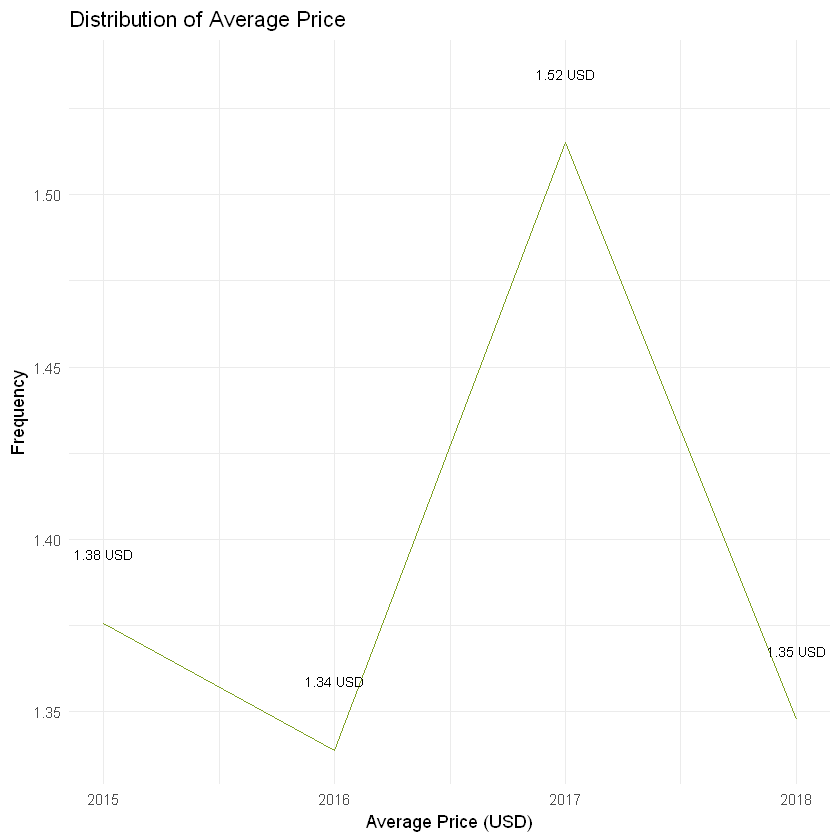

In [80]:
# Price vs year
avd_cleaned |>
  
  # Group by year
  group_by(year) |>
  
  # Compute mean price per year
  summarise(mean_price = mean(avg_price)) |>
  
  # Ungroup
  ungroup() |>
  
  # Aesthetic mapping
  ggplot(aes(x = year,
             y = mean_price)) +
  
  # Instantiate a line plot
  geom_line(color = "#7ea122") +
  
  # Add annotation
  geom_text(aes(label = paste(round(mean_price, 2), "USD")),
            nudge_y = 0.02,
            size = 3) +
  
  # Add text elements
  labs(title = "Distribution of Average Price",
       x = "Average Price (USD)",
       y = "Frequency") +
  
  # Adjust theme to minimal
  theme_minimal()

Comments:
- Avocado price was highest in 2017, at 1.52 USD, and lowest in 2016, at 1.34 USD.

#### 3.2.2 Price Across the Months

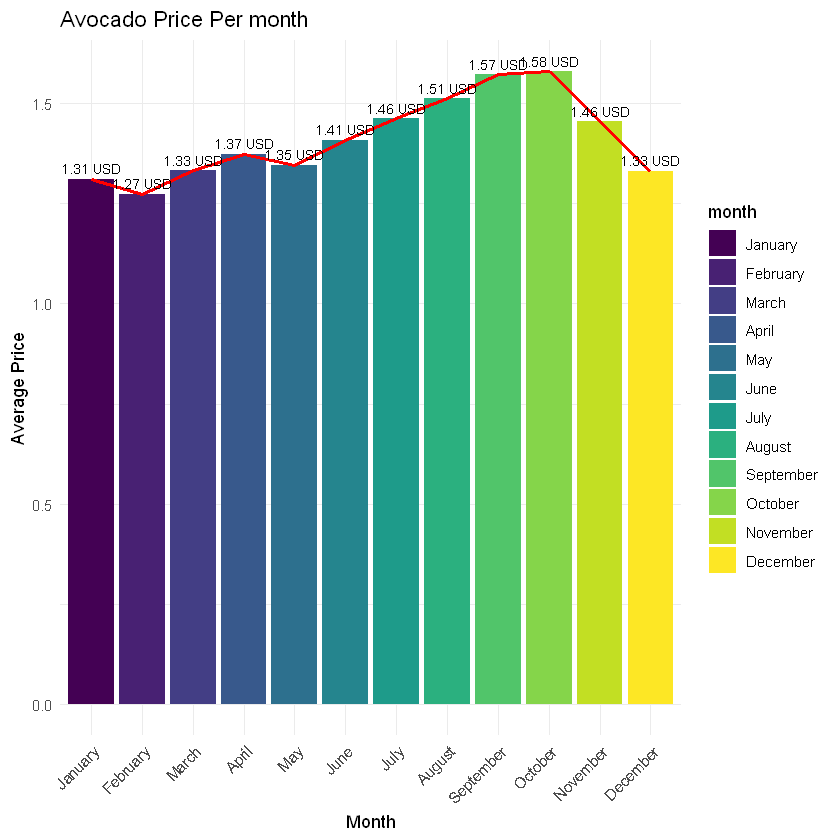

In [81]:
# Price vs month
avd_cleaned |>
  
  # Group by month
  group_by(month) |>
  
  # Compute mean price per month
  summarise(mean_price = mean(avg_price)) |>
  
  # Ungroup
  ungroup() |>
  
  # Aesthetic mapping
  ggplot(aes(x = month,
             y = mean_price,
             fill = month)) +
  
  # Instantiate a bar plot
  geom_col() +
  
  # Add a trend line
  geom_line(aes(group = 1),
            color = "red",
            linewidth = 1) +
  
  # Add annotation
  geom_text(aes(label = paste(round(mean_price, 2), "USD")),
            position = position_dodge(width = 0.9),
            vjust = -0.5,
            size = 3) +
  
  # Add text elements
  labs(title = "Avocado Price Per month",
       x = "Month",
       y = "Average Price") +
  
  # Adjust theme to minimal
  theme_minimal() +
  
  # Adjust x ticks
  theme(axis.text.x = element_text(angle = 45,
                                   hjust = 1))

Comments:
- The lowest price is in February, at 1.27 USD.
- The highest price is in October, at 1.58 USD.
- Throughout a year, the average price rises steadily, dipping twice, in February and May, until reaching a peak in October and then drops steadily for the rest of the year.

### 3.3 Price vs Region Group

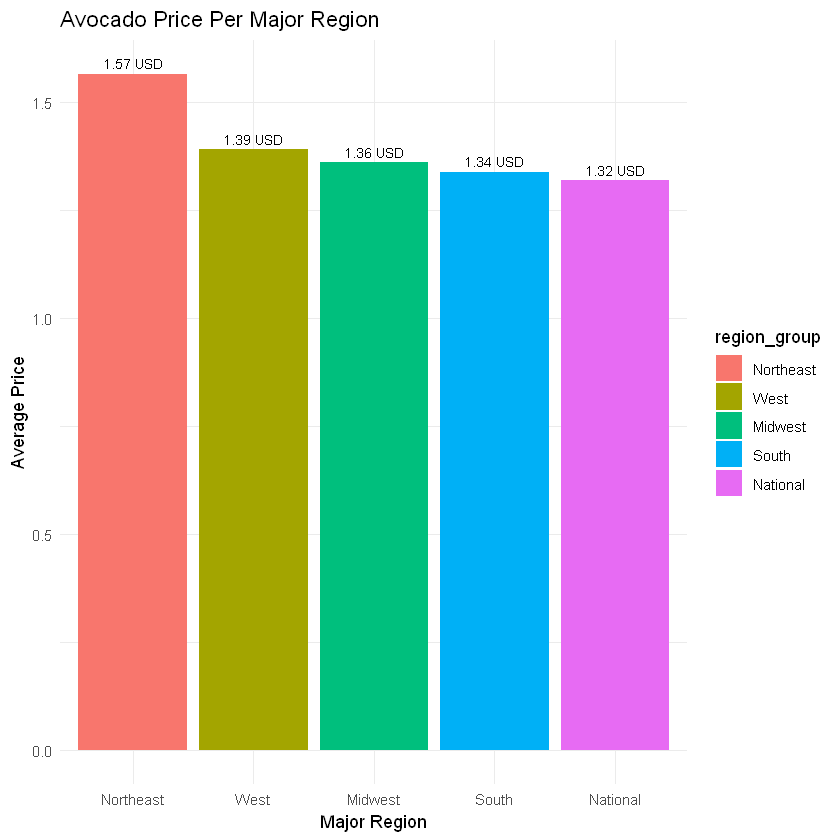

In [82]:
# Price vs region group
avd_cleaned |>
  
  # Group by region group
  group_by(region_group) |>
  
  # Compute mean price per region group
  summarise(mean_price = mean(avg_price)) |>
  
  # Ungroup
  ungroup() |>
  
  # Order by mean price
  mutate(region_group = fct_reorder(region_group,
                                    mean_price,
                                    .desc = TRUE)) |>
  
  # Aesthetic mapping
  ggplot(aes(x = region_group,
             y = mean_price,
             fill = region_group)) +
  
  # Instantiate a bar plot
  geom_col() +
  
  # Add annotation
  geom_text(aes(label = paste(round(mean_price, 2), "USD")),
            position = position_dodge(width = 0.9),
            vjust = -0.5,
            size = 3) +
  
  # Add text elements
  labs(title = "Avocado Price Per Major Region",
       x = "Major Region",
       y = "Average Price") +
  
  # Adjust theme to minimal
  theme_minimal()


Comments:
- Northeast region has the highest price on average (1.57 USD).
- The other regions have similar pricing levels (between 1.32 and 1.39 USD).

### 3.4 Price vs Pricing Strategy

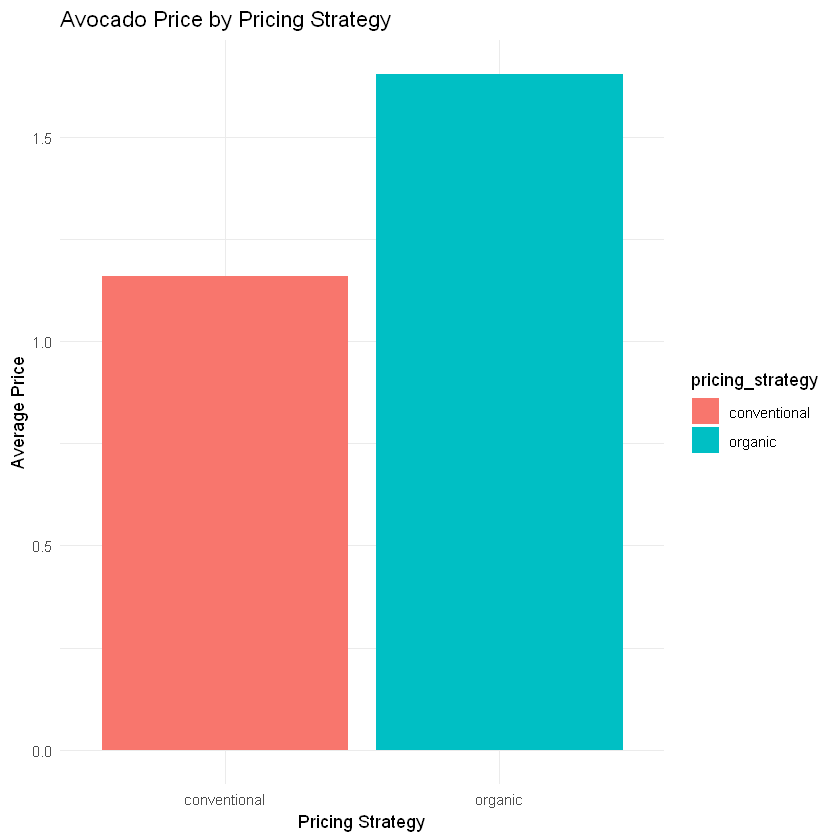

In [83]:
# Price vs pricing strategy
avd_cleaned |>
  
  # Group by pricing strategy
  group_by(pricing_strategy) |>
  
  # Compute mean price per pricing strategy
  summarise(mean_price = mean(avg_price)) |>
  
  # Ungroup
  ungroup() |>
  
  # Aesthetic mapping
  ggplot(aes(x = pricing_strategy,
             y = mean_price,
             fill = pricing_strategy)) +
  
  # Instantiate a line plot
  geom_col() +
  
  # Add text elements
  labs(title = "Avocado Price by Pricing Strategy",
       x = "Pricing Strategy",
       y = "Average Price") +
  
  # Adjust theme to minimal
  theme_minimal()

Comments:
- On average, organic pricing has a highper price than conventional.
- This is not surprising as organic pricing is generally associated with higher product pricing.

### 3.5 Price vs Volume

#### 3.5.1 Price vs Total Volume

`geom_smooth()` using formula = 'y ~ x'


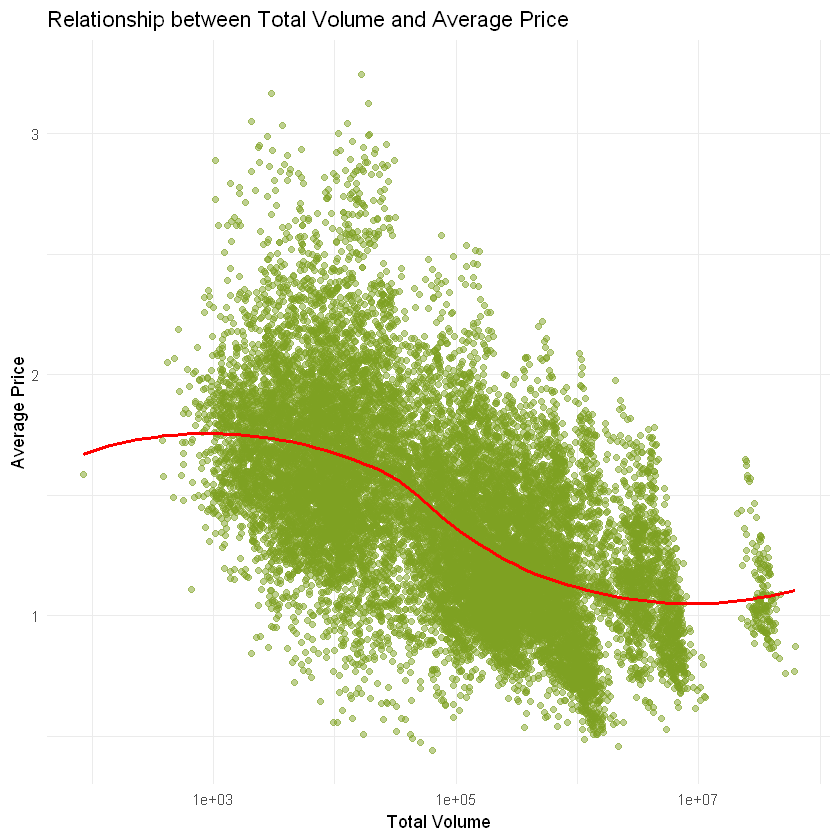

In [ ]:
# Price vs total volume
avd_cleaned |>
  
  # Aesthetic mapping
  ggplot(aes(x = vol_total,
             y = avg_price)) +
  
  # Instantiate a scatter plot
  geom_point(position = "jitter",
             alpha = 0.5,
             color = "#7ea122") +
  
  # Add a trend line
  geom_smooth(method = "loess",
              color = "red",
              se = FALSE) +
  
  # Add text elements
  labs(title = "Relationship between Total Volume and Average Price",
       x = "Total Volume",
       y = "Average Price") +
  
  # Adjust theme to minimal
  theme_minimal() +
  
  # Log-transform the x scale
  scale_x_log10()



In [85]:
# Conduct correlation test
cor.test(avd_cleaned$avg_price,
         avd_cleaned$vol_total,
         method = "pearson")


	Pearson's product-moment correlation

data:  avd_cleaned$avg_price and avd_cleaned$vol_total
t = -26.535, df = 18247, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2066832 -0.1787434
sample estimates:
       cor 
-0.1927524 


Comments:
- There is a weak yet significant negative correlation between price and volume such that as volume increases, price decreases.
- The magnitude of the correlation suggests that volume may not play a major role in avocado pricing.

#### 3.5.2 Explore Potential Moderator: Region Group

`geom_smooth()` using formula = 'y ~ x'


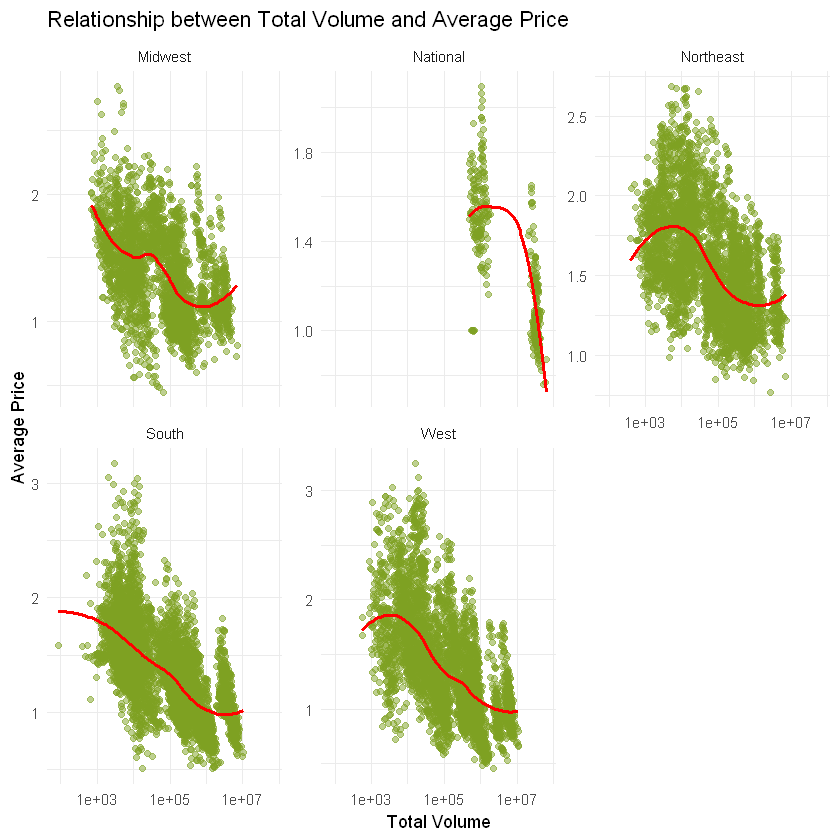

In [86]:
# Explore potential moderators: Region Group
avd_cleaned |>
  
  # Aesthetic mapping
  ggplot(aes(x = vol_total,
             y = avg_price)) +
  
  # Instantiate a scatter plot
  geom_point(position = "jitter",
             alpha = 0.5,
             color = "#7ea122") +
  
  # Add a trend line
  geom_smooth(method = "loess",
              color = "red",
              se = FALSE) +
  
  # Add text elements
  labs(title = "Relationship between Total Volume and Average Price",
       x = "Total Volume",
       y = "Average Price") +
  
  # Adjust theme to minimal
  theme_minimal() +
  
  # Log-transform the x scale
  scale_x_log10() +
  
  # Facet by Region.Group
  facet_wrap(~ region_group,
             scales = "free_y")

Comments:
- The relationship between pricing and volume is simiar across region groups, except for "National."
- This suggests that region groups may not be a moderator of this relationship.

#### 3.5.3 Explore Potential Moderator: Pricing Strategy

`geom_smooth()` using formula = 'y ~ x'


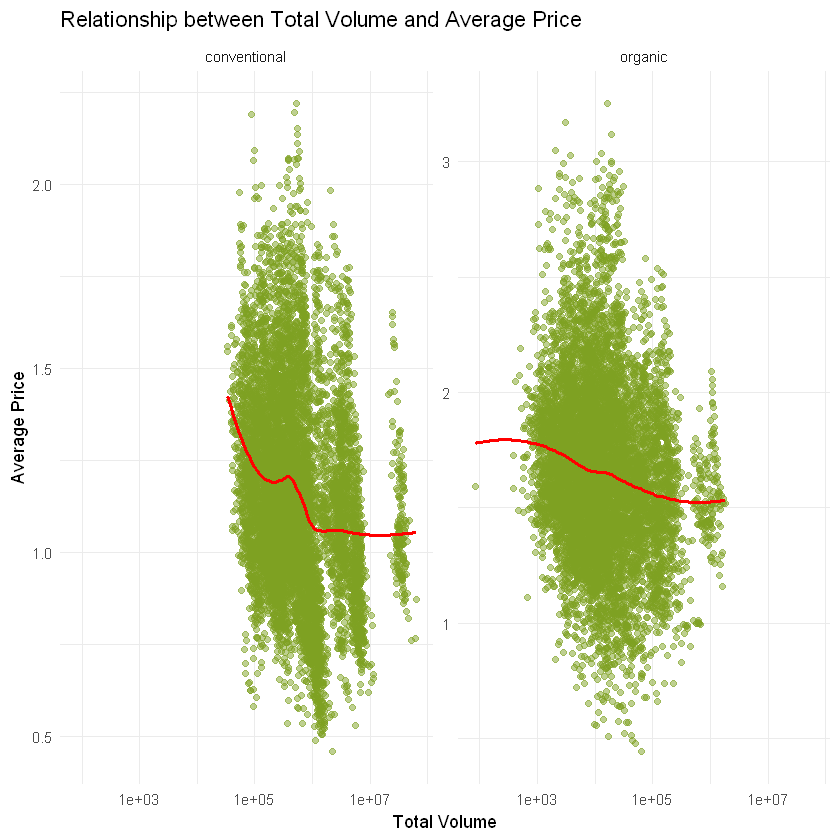

In [87]:
# Explore potential moderators: Pricing strategy
avd_cleaned |>
  
  # Aesthetic mapping
  ggplot(aes(x = vol_total,
             y = avg_price)) +
  
  # Instantiate a scatter plot
  geom_point(position = "jitter",
             alpha = 0.5,
             color = "#7ea122") +
  
  # Add a trend line
  geom_smooth(method = "loess",
              color = "red",
              se = FALSE) +
  
  # Add text elements
  labs(title = "Relationship between Total Volume and Average Price",
       x = "Total Volume",
       y = "Average Price") +
  
  # Adjust theme to minimal
  theme_minimal() +
  
  # Log-transform the x scale
  scale_x_log10() +
  
  # Facet by type
  facet_wrap(~ pricing_strategy,
             scales = "free_y")

Comments:
- The relationship between pricing and volume is simiar across pricing strategy.
- This suggests that pricing strategy may not be a moderator of this relationship.

### 3.6 Explore Potential Interaction Effects

#### 3.6.1 Pricing strategy x Region

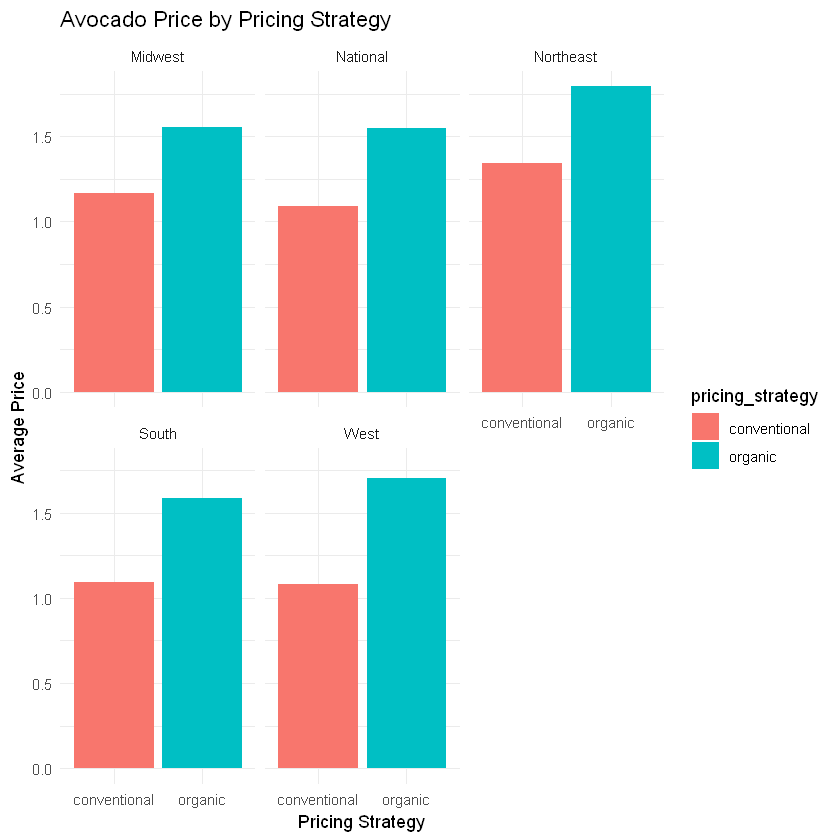

In [88]:
# Pricing strategy vs region
avd_cleaned |>
  
  # Group by type and major region
  group_by(pricing_strategy,
           region_group) |>
  
  # Compute mean price per type
  summarise(mean_price = mean(avg_price),
            .groups = "drop") |>
  
  # Aesthetic mapping
  ggplot(aes(x = pricing_strategy,
             y = mean_price,
             fill = pricing_strategy)) +
  
  # Instantiate a line plot
  geom_col() +
  
  # Add text elements
  labs(title = "Avocado Price by Pricing Strategy",
       x = "Pricing Strategy",
       y = "Average Price") +
  
  # Adjust theme to minimal
  theme_minimal() +
  
  # Facet by region
  facet_wrap(~ region_group)

Comments:
- Across all regions, organic pricing is consistently associated with higher price.
- This suggests that there is no interaction effect between pricing strategy and region on pricing.

#### 3.6.2 Pricing Strategy x Month

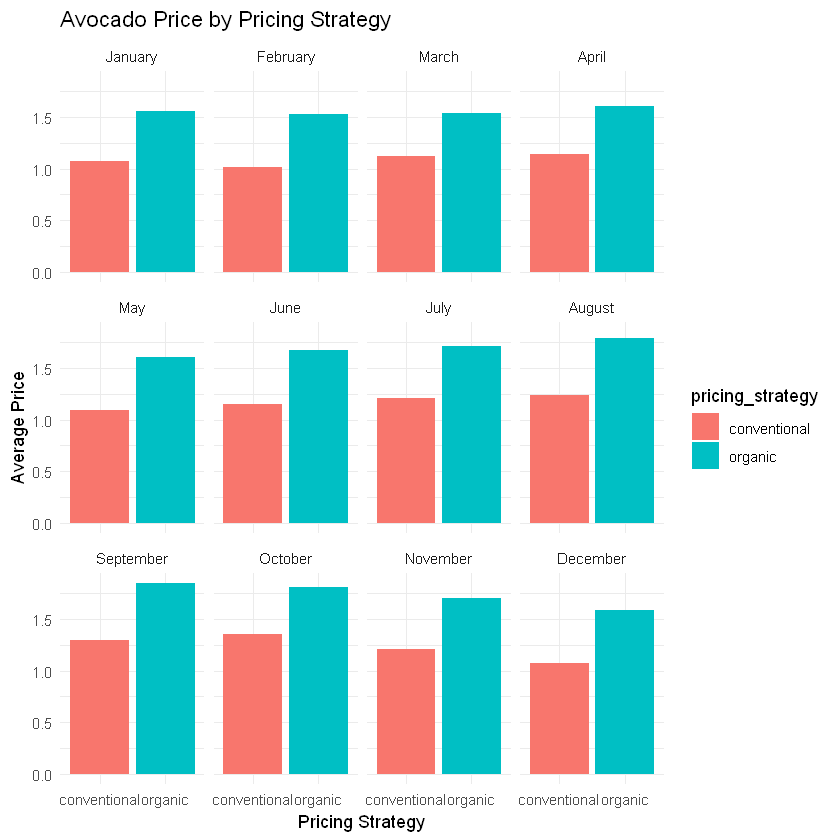

In [89]:
# Pricing strategy vs month
avd_cleaned |>
  
  # Group by type and major region
  group_by(pricing_strategy,
           month) |>
  
  # Compute mean price per type
  summarise(mean_price = mean(avg_price),
            .groups = "drop") |>
  
  # Aesthetic mapping
  ggplot(aes(x = pricing_strategy,
             y = mean_price,
             fill = pricing_strategy)) +
  
  # Instantiate a line plot
  geom_col() +
  
  # Add text elements
  labs(title = "Avocado Price by Pricing Strategy",
       x = "Pricing Strategy",
       y = "Average Price") +
  
  # Adjust theme to minimal
  theme_minimal() +
  
  # Facet by region
  facet_wrap(~ month)

Comments:
- Across all months, organic pricing is consistently associated with higher price.
- This suggests that there is no interaction effect between pricing strategy and month on pricing.

## 4. Building a Predictive Model

I will build an exXtreme Gradient Boosting (XGBoost) model due to its high performance and explanability.

### 4.1 Initial Model

#### 4.1.1 Split the Data

In [ ]:
# Set seed for reproducibility
set.seed(888)

# Create splitting index
avd_split <- initial_split(avd_cleaned,
                           prop = 0.8,
                           strata = avg_price)

# Create a training set
avd_train <- training(avd_split)

# Create a test set
avd_test <- testing(avd_split)

# Check the results
cat("Training set:", nrow(avd_train), "\n")
cat("Test set:", nrow(avd_test))

Training set: 14597 
Test set: 3652

#### 4.1.2 Define the Recipe

In [ ]:
# Define the recipe
avd_recipe <- recipe(avg_price ~ .,
                     avd_train) |>
  
  # Remove redundant variables
  step_rm(date, year, region,
          vol_4046, vol_4225, vol_4770,
          bags_small, bags_large, bags_xl) |>
  
  # Normalise all numeric variables
  step_normalize(all_numeric()) |>

  # Dummy-encode nominal variables
  step_dummy(all_nominal())

# Check the recipe
avd_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 14



── Operations 

• Variables removed: date, year, region, vol_4046, vol_4225, vol_4770, ...

• Centering and scaling for: all_numeric()

• Dummy variables from: all_nominal()



#### 4.1.3 Instantiate the Model

In [93]:
# Instantiate an XGBoost model
xgb_mod <- boost_tree() |>
  
  # Set engine
  set_engine("xgboost") |>
  
  # Set mode
  set_mode("regression")

#### 4.1.4 Bundle the Recipe and the Model

In [94]:
# Bundle the recipe and the model
xgb_wfl <- workflow() |>
  
  # Add recipe
  add_recipe(avd_recipe) |>
  
  # Add model
  add_model(xgb_mod)

#### 4.1.5 Fit the Model

In [95]:
# Set the metrics
xgb_metrics <-metric_set(mae,
                         rmse,
                         rsq)

## Set seed for reproducibility
set.seed(888)

## Fit
xgb_fit <- last_fit(xgb_wfl,
                    split = avd_split,
                    metrics = xgb_metrics)

#### 4.1.6 Evaluate the model

In [96]:
# Collect metrics
xgb_performance <- collect_metrics(xgb_fit)

# Print the results
xgb_performance

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
mae,standard,0.4449552,Preprocessor1_Model1
rmse,standard,0.5817811,Preprocessor1_Model1
rsq,standard,0.6493010,Preprocessor1_Model1
